## Libraries 

In [315]:
import numpy as np
# from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

## The purpose of this Sprint

<li>Understanding linear regression through scratch</li>
<li>Get used to object-oriented implementation</li>
<li>Allow formulas to be incorporated into code</li>

## How to learn
After implementing linear regression with scratch, we will train and verify.

## Scratch Linear Regression
We will create a class of linear regression from scratch. We will implement the algorithm using only the minimum library such as NumPy.


The template is prepared below. Add some code to this ScratchLinearRegression class.


In [317]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=1000, lr=0.001, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        x0 = np.ones(x1.shape[0]).reshape(-1, 1)
    
        return np.concatenate([x0, x1],axis=1)
    
    def _gradient_descent(self, X, error):
        """
        最急降下法により、θの値を更新し、学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 真の値と推定した値の誤差
        """
        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。
        検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        # バイアス項有無で分岐
        if self.no_bias is not True:   
            # パラメータθの初期値を乱数で与える
            x1 = self._linear_hypothesis(X)
            # θはXの特徴量の種類の数分用意する
            self.theta = np.random.random(x1.shape[1])
            print("Shape:",x1.shape[1])
        else:
            x1 = X
            self.theta = np.random.random(x1.shape[1])
            print("Shape:",x1.shape[1])
        
        for i in range(self.iter):
            
            # 仮定関数で予測値を計算
            y1 = np.dot(x1,self.theta.T)
            
            # 真の値と予測値の誤差を計算
            print("Y1",y1.shape, " Y",y.shape)
            error = y1 - y
            self.loss[i] += np.mean(error**2)/2
            
            # X_validを入力した場合は、x2として読み込む
            if X_val is not None:
                if self.no_bias is not True:
                    x2 = self._linear_hypothesis(X_val)
                else:
                    x2 = X_val
                y2 = np.dot(x2,self.theta)
                
                error_val = y2 - y_val
                self.val_loss[i] += np.mean(error_val**2)/2 
            
            # パラメータθを最急降下法で、最適化
            self._gradient_descent(x1, error)
            print("Theta Shape",self.theta.shape)
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
                
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias is not True:
            return np.dot(self._linear_hypothesis(X),self.theta)
        return np.dot(X,self.theta)

## Problem1: Hypothetical function
Implement the linear regression hypothetical function represented by the following formula. I have prepared a method template
<center> $h_{θ}(x) = θ_{0}.x_{0} + θ_{1}.x_{1} + θ_{2}.x_{2} + θ_{3}.x_{3} + ... +θ_{n}.x_{n}  (x_{0}=1)$</center>

$x$: Feature vector
$\theta$: parameter vector


$n$: Number of features


$x_j$: jth feature


$\theta_j$: jth parameter (weight)

The feature quantity $ n $ should be implemented so that it can correspond to any value.
The vector format is as follows.
<center> $h_{θ}(x) = θ^{T}.x $</center>

Since it is a method that is never called from outside the class, it is customary in Python to prefix it with an underscore.
```
def _linear_hypothesis(self, X):
    """
    Compute a linear hypothetical function
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    Returns
    -------
      The following form of ndarray, shape (n_samples, 1)
      Estimated result by linear hypothetical function
    """
    pass
    return
```

In [337]:
def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        x0 = np.ones(x1.shape[0]).reshape(-1, 1)
    
        return np.concatenate([x0, x1],axis=1)

## Problem 2: Steepest descent
Implement the steepest descent method for training. Add a method _gradient_descent that updates the parameters as in the following equation, and
Please it call from the fit method.
<center> $θ_{j} = θ_{j} - α \frac{1}{m} \sum_{i=1}^{m} [(h_{x}(x^{(i)}) - y^{(i)}) x_{j}^{(i)}] $</center>

$\alpha$: learning rate

$i$: sample index

$j$: Feature index

Add the following method to the ScratchLinearRegression class. Please also describe the commented out part.
```
def _gradient_descent(self, X, error):
    """
    Write a description
    """
    pass
```

In [338]:
def _gradient_descent(self, X, error):
        """
        最急降下法により、θの値を更新し、学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 真の値と推定した値の誤差
        """
        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)

## Problem 3: Estimated
Please implement the estimation mechanism. Add it to the predict method included in the template of the ScratchLinearRegression class.


The output of the hypothetical function $h_\theta(x)$ is the estimation result.

In [339]:
def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias is not True:
            return np.dot(self._linear_hypothesis(X),self.theta)
        return np.dot(X,self.theta)

## Problem 4: Mean squared error
Create a function of mean square error (MSE) used as an index value for linear regression.


Since the mean square error function is a function that can be used for regression problems in general, create it as a separate function instead of the method of the ScratchLinearRegression class. We have a template.


The mean square error is expressed by the following formula.

<center> $L(θ) = \frac{1}{m} \sum_{i=1}^{m} (h_{θ} (x^{i}) - y^{i})^2 $</center>

$m$: Number of input data


$h_\theta()$: Assumption function


$x^{(i)}$: Feature vector of the i-th sample


$y^{(i)}$: Correct value of i-th sample

As the objective function (loss function) for the steepest descent method, divide this by 2 and use it. (Problems 5, 9)

```
def MSE(y_pred, y):
    """
    Calculation of mean square error
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      Estimated value
    y : 次の形のndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    pass
    return mse
```

In [340]:
def MSE(y_pred, y):
    """
    Calculation of mean square error
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      Estimated value
    y : 次の形のndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    (1/len(y_pred))* np.sum(np.square(y_pred - y))
    return mse

## Problem 5: Objective function
Implement the objective function (loss function) of linear regression represented by the following formula and be sure to record this in self.loss,self.val_loss.


The objective function (loss function) $J(\theta)$ is the following formula.

<center> $J(θ) = \frac{1}{2m} \sum_{i=1}^{m} (h_{θ}(x^{(i)} - y^{(i)}))^2 $</center>

$m$: Number of input data


$h_\theta()$: Assumption function


$x^{(i)}$: Feature vector of the i-th sample


$y^{(i)}$: Correct value of i-th sample

## Problem 6: Learning and estimation
Learn and estimate scratch implementations from the House Prices competition data provided in Sprint, an introduction to machine learning scratch.


Compare this with the scikit-learn implementation and see if it works correctly.

In [ ]:
data = pd.read_csv('train.csv')

In [358]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [359]:
X = data.loc[:,"LotArea"]
X.head()

0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64

In [361]:
X.shape

(1460,)

In [360]:
Y = data.iloc[:,-1]
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(),Y.to_numpy(),test_size = 0.25)

In [363]:
print("X_train_trans.shape:", X_train.shape)
print("X_test_trans.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train_trans.shape: (1095,)
X_test_trans.shape: (365,)
y_train.shape: (1095,)
y_test.shape: (365,)


In [364]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1,1))

X_train_trans = scaler.transform(X_train.reshape(-1,1))
X_test_trans = scaler.transform(X_test.reshape(-1,1))

In [365]:
my_model = ScratchLinearRegression(1000,0.02,False,True)

In [366]:
print(X_train_trans.shape)
print(y_train.shape)
print(X_test_trans.shape)
print(y_test.shape)

(1095, 1)
(1095,)
(365, 1)
(365,)


In [367]:
my_model.fit(X_train_trans,y_train,X_test_trans,y_test)

Shape: 2
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 0 loss: 19731643909.59457 theta: [3628.54128983  438.8415185 ]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 1 loss: 19070581146.098896 theta: [7183.99356906  868.62307032]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 2 loss: 18435696468.037643 theta: [10668.3368027   1289.80899111]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 3 loss: 17825953223.22762 theta: [14082.99317167  1702.57119349]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 4 loss: 17240355810.91207 theta: [17429.35641326  2107.07815182]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 5 loss: 16677948056.124218 theta: [20708.79239001  2503.49497098]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 6 loss: 16137811648.425962 theta: [23922.63964724  2891.98345376]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 7 loss: 15619064642.472563 theta: [27072.20995931  3272.70216688]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 8 loss: 15120860017.954914 theta: [30158.788865

Theta Shape (2,)
n_iter: 104 loss: 3287927598.134301 theta: [159655.28811     19299.28798456]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 105 loss: 3278036000.5724483 theta: [160090.20545282  19351.86060707]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 106 loss: 3268536110.2740455 theta: [160516.42444879  19403.38177713]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 107 loss: 3259412415.6314588 theta: [160934.11906483  19453.87252378]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 108 loss: 3250650019.296719 theta: [161343.45978856  19503.3534555 ]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 109 loss: 3242234613.856834 theta: [161744.61369781  19551.84476859]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 110 loss: 3234152458.4723697 theta: [162137.74452888  19599.36625542]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 111 loss: 3226390356.441129 theta: [162523.01274332  19645.9373125 ]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 112 loss: 3218935633.6503263 theta: [162900

Theta Shape (2,)
n_iter: 223 loss: 3040178593.3225636 theta: [179436.52992741  21690.43604048]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 224 loss: 3040097856.351256 theta: [179475.82243388  21695.18570186]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 225 loss: 3040020316.5640116 theta: [179514.32909023  21699.84037002]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 226 loss: 3039945847.352343 theta: [179552.06561345  21704.40194482]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 227 loss: 3039874327.1214557 theta: [179589.0474062   21708.87228812]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 228 loss: 3039805639.0917115 theta: [179625.2895631   21713.25322456]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 229 loss: 3039739671.1079464 theta: [179660.80687686  21717.54654226]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 230 loss: 3039676315.456337 theta: [179695.61384435  21721.75399362]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 231 loss: 3039615468.688532 theta: [179729

n_iter: 300 loss: 3038230603.3054175 theta: [180986.49962147  21877.7957146 ]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 301 loss: 3038227006.7387886 theta: [180994.79273406  21878.79818251]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 302 loss: 3038223552.596198 theta: [181002.91998441  21879.78060105]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 303 loss: 3038220235.237655 theta: [181010.88468974  21880.74337123]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 304 loss: 3038217049.2465096 theta: [181018.69010097  21881.686886  ]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 305 loss: 3038213989.420614 theta: [181026.33940397  21882.61153048]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 306 loss: 3038211050.763823 theta: [181033.83572091  21883.51768207]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 307 loss: 3038208228.4778414 theta: [181041.18211152  21884.40571062]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 308 loss: 3038205517.954385 theta: [181048.38157431  21885.2

Theta Shape (2,)
n_iter: 419 loss: 3038140522.224233 theta: [181363.69328444  21923.39072336]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 420 loss: 3038140492.868419 theta: [181364.44252378  21923.48129109]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 421 loss: 3038140464.6750956 theta: [181365.17677832  21923.57004747]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 422 loss: 3038140437.5982275 theta: [181365.89634778  21923.65702871]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 423 loss: 3038140411.593603 theta: [181366.60152585  21923.74227034]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 424 loss: 3038140386.6187625 theta: [181367.29260035  21923.82580713]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 425 loss: 3038140362.6329255 theta: [181367.96985337  21923.90767318]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 426 loss: 3038140339.5969276 theta: [181368.63356132  21923.98790192]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 427 loss: 3038140317.473155 theta: [181369

Theta Shape (2,)
n_iter: 511 loss: 3038139798.9292507 theta: [181395.31556458  21927.21321107]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 512 loss: 3038139798.215919 theta: [181395.43235832  21927.22732904]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 513 loss: 3038139797.530834 theta: [181395.54681617  21927.24116466]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 514 loss: 3038139796.8728786 theta: [181395.65898487  21927.25472356]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 515 loss: 3038139796.2409787 theta: [181395.7689102   21927.26801129]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 516 loss: 3038139795.634102 theta: [181395.87663702  21927.28103326]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 517 loss: 3038139795.0512567 theta: [181395.9822093   21927.29379479]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 518 loss: 3038139794.4914927 theta: [181396.08567013  21927.3063011 ]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 519 loss: 3038139793.9538956 theta: [18139

Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 626 loss: 3038139781.088623 theta: [181400.5832614   21927.84996801]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 627 loss: 3038139781.081779 theta: [181400.59470119  21927.85135084]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 628 loss: 3038139781.075206 theta: [181400.60591219  21927.85270602]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 629 loss: 3038139781.0688934 theta: [181400.61689897  21927.8540341 ]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 630 loss: 3038139781.062832 theta: [181400.62766601  21927.85533562]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 631 loss: 3038139781.0570087 theta: [181400.63821772  21927.8566111 ]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 632 loss: 3038139781.0514174 theta: [181400.64855838  21927.85786108]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 633 loss: 3038139781.0460467 theta: [181400.65869224  21927.85908605]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 634 loss: 3038139781.

Theta Shape (2,)
n_iter: 723 loss: 3038139780.9192333 theta: [181401.07465438  21927.90936738]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 724 loss: 3038139780.919098 theta: [181401.07626632  21927.90956223]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 725 loss: 3038139780.9189672 theta: [181401.07784601  21927.90975318]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 726 loss: 3038139780.918842 theta: [181401.07939412  21927.90994032]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 727 loss: 3038139780.9187217 theta: [181401.08091126  21927.91012371]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 728 loss: 3038139780.918606 theta: [181401.08239805  21927.91030343]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 729 loss: 3038139780.9184947 theta: [181401.08385512  21927.91047956]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 730 loss: 3038139780.9183884 theta: [181401.08528304  21927.91065217]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 731 loss: 3038139780.9182863 theta: [18140

Theta Shape (2,)
n_iter: 807 loss: 3038139780.9159174 theta: [181401.14048361  21927.91732479]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 808 loss: 3038139780.915913 theta: [181401.14077896  21927.91736049]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 809 loss: 3038139780.915909 theta: [181401.1410684   21927.91739548]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 810 loss: 3038139780.915904 theta: [181401.14135206  21927.91742977]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 811 loss: 3038139780.9159007 theta: [181401.14163004  21927.91746337]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 812 loss: 3038139780.915896 theta: [181401.14190246  21927.9174963 ]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 813 loss: 3038139780.9158926 theta: [181401.14216944  21927.91752857]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 814 loss: 3038139780.9158893 theta: [181401.14243107  21927.9175602 ]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 815 loss: 3038139780.915886 theta: [181401.

Theta Shape (2,)
n_iter: 921 loss: 3038139780.9158034 theta: [181401.15377516  21927.91893147]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 922 loss: 3038139780.9158034 theta: [181401.15380468  21927.91893503]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 923 loss: 3038139780.9158034 theta: [181401.15383361  21927.91893853]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 924 loss: 3038139780.9158034 theta: [181401.15386196  21927.91894196]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 925 loss: 3038139780.9158034 theta: [181401.15388974  21927.91894532]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 926 loss: 3038139780.9158034 theta: [181401.15391697  21927.91894861]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 927 loss: 3038139780.9158034 theta: [181401.15394366  21927.91895183]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 928 loss: 3038139780.9158034 theta: [181401.15396981  21927.91895499]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 929 loss: 3038139780.9158034 theta: [18

Theta Shape (2,)
n_iter: 997 loss: 3038139780.9158025 theta: [181401.15493326  21927.91907146]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 998 loss: 3038139780.9158025 theta: [181401.15493962  21927.91907222]
Y1 (1095,)  Y (1095,)
Theta Shape (2,)
n_iter: 999 loss: 3038139780.9158025 theta: [181401.15494585  21927.91907298]


In [368]:
y_pred = my_model.predict(X_test_trans)

Root mean square error 74328.05499681557


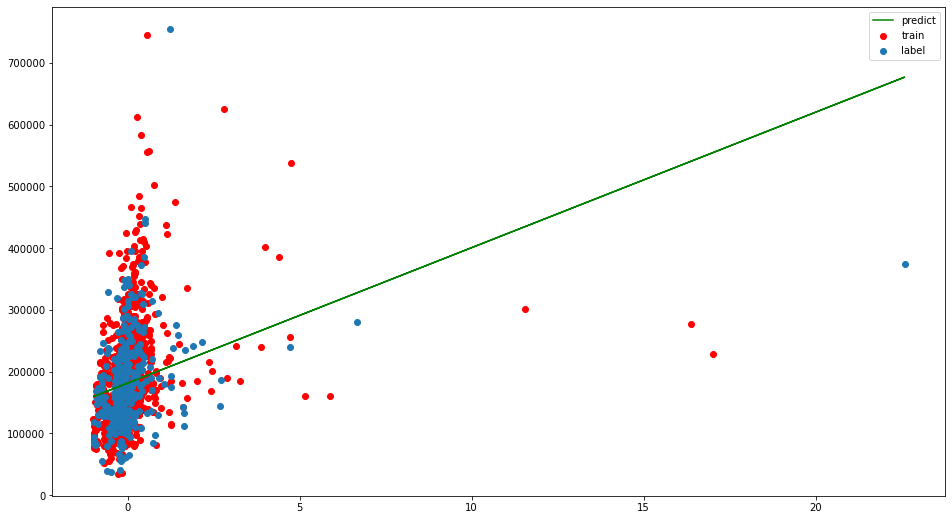

In [369]:
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_train_trans, y_train, label='train',color='Red')
plt.plot(X_test_trans, y_pred, label='predict',color='Green')
plt.scatter(X_test_trans, y_test, label='label')
plt.legend()

mse = MSE(y_pred,y_test)
print("Root mean square error",np.sqrt(mse));

## Problem 7: Learning curve plot
Create and execute a function that displays the learning curve. Look at the graph to see if the loss is down properly.


In the template of the linear regression class, the loss is recorded in self.loss and self.val_loss, so please use this for input.

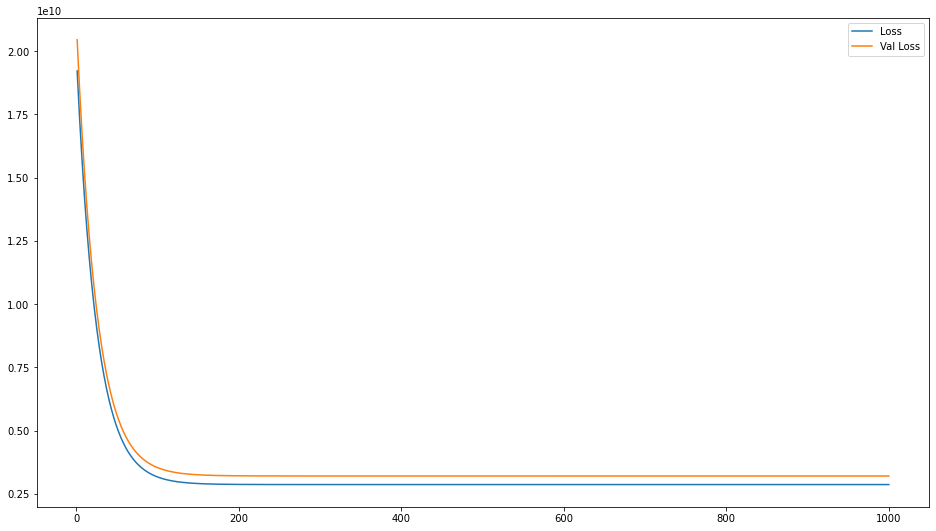

In [341]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(my_model.loss),label='Loss')
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(my_model.val_loss),label='Val Loss',)
_ = plt.legend()

## Problem 8: (Advance task) Removal of bias term
Verify how learning changes when the bias term $\theta_0$ is removed. Also, consider and investigate the role of bias terms in linear regression models.

In [343]:
new_model = ScratchLinearRegression(1000,0.02,True,True)

In [344]:
new_model.fit(X_train_trans,y_train,X_test_trans,y_test)

Shape: 1
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 0 loss: 19212259537.15603 theta: [443.96369386]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 1 loss: 19202506550.963444 theta: [878.96672275]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 2 loss: 19193139783.02409 theta: [1305.26969106]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 3 loss: 19184143939.095135 theta: [1723.0466]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 4 loss: 19175504330.585766 theta: [2132.46797076]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 5 loss: 19167206850.573364 theta: [2533.7009141]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 6 loss: 19159237950.769455 theta: [2926.90919858]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 7 loss: 19151584619.39778 theta: [3312.25331737]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 8 loss: 19144234359.94843 theta: [3689.89055379]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 9 loss: 19137175170.773266 theta: [4059.97504547]
Y1 (1095,)  Y (1095,)
Theta Shap

Theta Shape (1,)
n_iter: 111 loss: 18968749360.969833 theta: [19884.40922005]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 112 loss: 18968639377.754223 theta: [19930.60333841]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 113 loss: 18968533749.873955 theta: [19975.8735744]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 114 loss: 18968432304.857742 theta: [20020.23840567]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 115 loss: 18968334877.064175 theta: [20063.71594032]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 116 loss: 18968241307.41123 theta: [20106.32392428]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 117 loss: 18968151443.116543 theta: [20148.07974855]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 118 loss: 18968065137.447926 theta: [20189.00045634]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 119 loss: 18967982249.483784 theta: [20229.10274998]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 120 loss: 18967902643.88302 theta: [20268.40299774]
Y1 (1095,)  Y (1095,)
The

Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 247 loss: 18965983412.789474 theta: [22046.10107471]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 248 loss: 18965982961.121803 theta: [22049.06135598]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 249 loss: 18965982527.34018 theta: [22051.96243162]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 250 loss: 18965982110.736305 theta: [22054.80548575]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 251 loss: 18965981710.629944 theta: [22057.59167879]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 252 loss: 18965981326.367798 theta: [22060.32214798]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 253 loss: 18965980957.32243 theta: [22062.99800778]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 254 loss: 18965980602.89126 theta: [22065.62035039]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 255 loss: 18965980262.495564 theta: [22068.19024614]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 256 loss: 18965979935.579533 theta: [22070.70874398]
Y1 

n_iter: 377 loss: 18965972066.73059 theta: [22183.40752126]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 378 loss: 18965972064.36686 theta: [22183.62167359]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 379 loss: 18965972062.096725 theta: [22183.83154288]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 380 loss: 18965972059.916492 theta: [22184.03721479]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 381 loss: 18965972057.822598 theta: [22184.23877325]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 382 loss: 18965972055.81162 theta: [22184.43630055]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 383 loss: 18965972053.880276 theta: [22184.6298773]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 384 loss: 18965972052.025414 theta: [22184.81958251]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 385 loss: 18965972050.244007 theta: [22185.00549363]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 386 loss: 18965972048.533142 theta: [22185.18768651]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_it

Theta Shape (1,)
n_iter: 520 loss: 18965972007.22507 theta: [22193.51944625]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 521 loss: 18965972007.217754 theta: [22193.53136008]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 522 loss: 18965972007.210728 theta: [22193.54303564]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 523 loss: 18965972007.20398 theta: [22193.55447769]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 524 loss: 18965972007.197495 theta: [22193.5656909]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 525 loss: 18965972007.191273 theta: [22193.57667984]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 526 loss: 18965972007.1853 theta: [22193.58744901]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 527 loss: 18965972007.179554 theta: [22193.59800279]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 528 loss: 18965972007.174046 theta: [22193.60834549]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 529 loss: 18965972007.16875 theta: [22193.61848135]
Y1 (1095,)  Y (1095,)
Theta 

Theta Shape (1,)
n_iter: 665 loss: 18965972007.04085 theta: [22194.08331057]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 666 loss: 18965972007.040836 theta: [22194.08394712]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 667 loss: 18965972007.040813 theta: [22194.08457094]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 668 loss: 18965972007.040794 theta: [22194.08518228]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 669 loss: 18965972007.04078 theta: [22194.0857814]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 670 loss: 18965972007.04076 theta: [22194.08636853]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 671 loss: 18965972007.04074 theta: [22194.08694392]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 672 loss: 18965972007.040726 theta: [22194.08750781]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 673 loss: 18965972007.04071 theta: [22194.08806041]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 674 loss: 18965972007.040695 theta: [22194.08860197]
Y1 (1095,)  Y (1095,)
Theta 

Theta Shape (1,)
n_iter: 800 loss: 18965972007.040333 theta: [22194.11305683]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 801 loss: 18965972007.04033 theta: [22194.11309846]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 802 loss: 18965972007.040333 theta: [22194.11313925]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 803 loss: 18965972007.04033 theta: [22194.11317923]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 804 loss: 18965972007.04033 theta: [22194.11321841]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 805 loss: 18965972007.040333 theta: [22194.1132568]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 806 loss: 18965972007.04033 theta: [22194.11329442]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 807 loss: 18965972007.04033 theta: [22194.1133313]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 808 loss: 18965972007.04033 theta: [22194.11336743]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 809 loss: 18965972007.04033 theta: [22194.11340285]
Y1 (1095,)  Y (1095,)
Theta Sha

n_iter: 916 loss: 18965972007.040325 theta: [22194.1149383]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 917 loss: 18965972007.04033 theta: [22194.1149423]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 918 loss: 18965972007.04033 theta: [22194.11494621]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 919 loss: 18965972007.04033 theta: [22194.11495005]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 920 loss: 18965972007.04033 theta: [22194.11495381]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 921 loss: 18965972007.04033 theta: [22194.11495749]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 922 loss: 18965972007.040325 theta: [22194.11496111]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 923 loss: 18965972007.04033 theta: [22194.11496465]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 924 loss: 18965972007.040325 theta: [22194.11496811]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 925 loss: 18965972007.04033 theta: [22194.11497151]
Y1 (1095,)  Y (1095,)
Theta Shape (1,)
n_iter: 9

In [345]:
y_pred = new_model.predict(X_test_trans)

Root mean square error 74328.05499681557


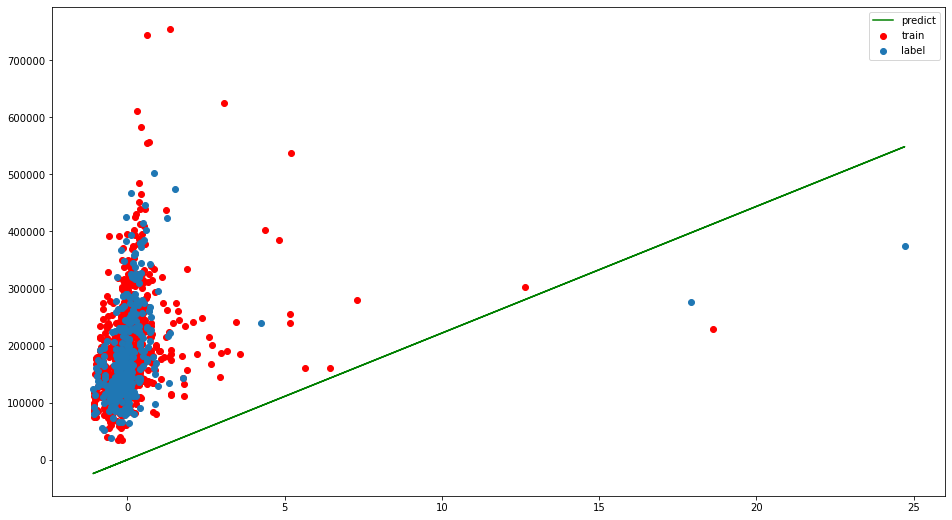

In [346]:
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_train_trans, y_train, label='train',color='Red')
plt.plot(X_test_trans, y_pred, label='predict',color='Green')
plt.scatter(X_test_trans, y_test, label='label')
plt.legend()

# mse = my_model.MSE(y_pred)
# mse = (1/len(y_pred))* np.sum(np.square(y_pred - y_test))
mse = MSE(y_pred,y_test)
print("Root mean square error",np.sqrt(mse));

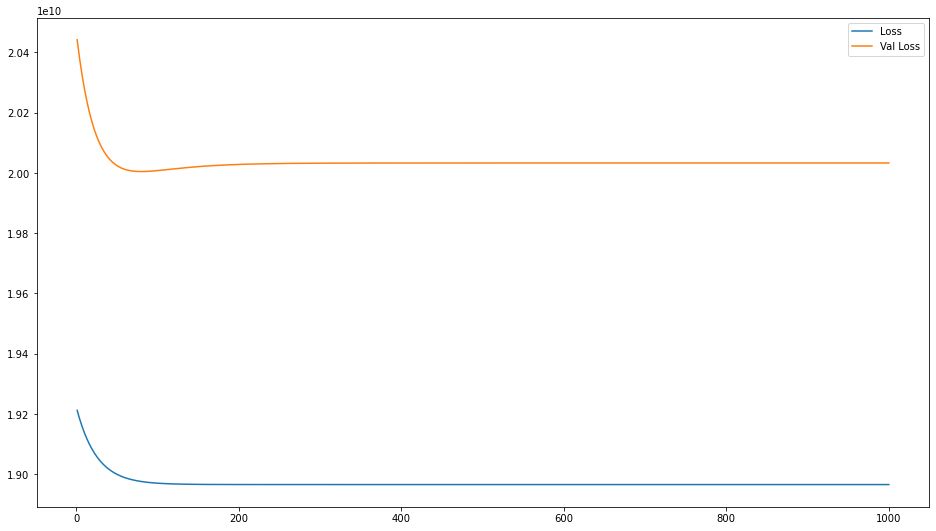

In [347]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(new_model.loss),label='Loss')
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(new_model.val_loss),label='Val Loss',)
_ = plt.legend()

In linear regression, bias help to increase accuracy result for the models

## Problem 9: (Advance task) Multidimensional feature quantity
Please verify how the learning result changes when the square or cube of the feature is used for input.

In [348]:
X = data[['YearBuilt', 'LotArea', 'MoSold']]
X.head()

,YearBuilt,LotArea,MoSold
0,2003,8450,2
1,1976,9600,5
2,2001,11250,9
3,1915,9550,2
4,2000,14260,12


In [349]:
X = X.values

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=2)

In [351]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (1095, 3)
X_test.shape: (365, 3)
y_train.shape: (1095,)
y_test.shape: (365,)


In [352]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [353]:
print("X_train_trans.shape:", X_train_trans.shape)
print("X_test_trans.shape:", X_test_trans.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)


X_train_trans.shape: (1095, 3)
X_test_trans.shape: (365, 3)
y_train.shape: (1095,)
y_test.shape: (365,)


In [354]:
multi_model = ScratchLinearRegression(1000,0.02,False,True)

In [355]:
multi_model.fit(X_train_trans,y_train,X_test_trans,y_test)

Shape: 4
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 0 loss: 19093140554.312492 theta: [3586.47054575  831.73139711  445.36646137  115.58521627]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 1 loss: 18411963992.052788 theta: [7100.67468735 1646.56642159  880.55946262  228.22080774]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 2 loss: 17757797193.50341 theta: [10544.59474612  2444.89243645  1306.73069204   338.27912063]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 3 loss: 17129569129.410812 theta: [13919.6364037   3227.04411713  1724.06703189   445.81828043]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 4 loss: 16526251242.422161 theta: [17227.17722814  3993.34935063  2132.751496     550.89511661]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 5 loss: 15946855762.774519 theta: [20468.56723609  4744.12937324  2532.96330974   653.56519132]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 6 loss: 15390434090.781979 theta: [23645.12944388  5479.69890552  2924.87798846   753.88282735]

Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 62 loss: 3312018581.3205414 theta: [129083.96502895  29747.49409513  15707.87773054   3853.22051223]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 63 loss: 3256567859.5264816 theta: [130088.21928088  29976.65049684  15826.54394672   3879.58914656]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 64 loss: 3203315602.9638295 theta: [131072.38844777  30201.16756426  15942.74753572   3905.33920285]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 65 loss: 3152174644.9377017 theta: [132036.87423133  30421.13927818  16056.53955971   3930.4849003 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 66 loss: 3103061274.965946 theta: [132982.07029921  30636.65771448  16167.9700229    3955.04013631]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 67 loss: 3055895101.7321224 theta: [133908.36244574  30847.81308275  16277.08789349   3979.0184936 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 68 loss: 3010598921.4729595 theta: [134816.12874934  31054.6937641

Theta Shape (4,)
n_iter: 119 loss: 2052787288.1472626 theta: [163422.1797163   37539.48912555  19695.13894442   4683.06997669]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 120 loss: 2047259984.0578704 theta: [163739.66967449  37610.93884213  19731.02467863   4689.74130198]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 121 loss: 2041951800.420319 theta: [164050.80983351  37680.94307245  19766.16488428   4696.25078517]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 122 loss: 2036854050.2250245 theta: [164355.72718935  37749.53107787  19800.57503515   4702.60223836]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 123 loss: 2031958390.872457 theta: [164654.54619807  37816.73152705  19834.27028417   4708.79938574]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 124 loss: 2027256810.517888 theta: [164947.38882662  37882.57250796  19867.26546998   4714.84586562]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 125 loss: 2022741614.9575655 theta: [165234.3746026   37947.08153965  19899.57512354

Theta Shape (4,)
n_iter: 178 loss: 1926178267.3523781 theta: [174476.77278724  40013.94917437  20921.73088037   4891.95601167]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 179 loss: 1925670006.210567 theta: [174573.17088401  40035.3534132   20932.12195289   4893.4658386 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 180 loss: 1925181892.2323496 theta: [174667.64101884  40056.32495552  20942.29688129   4894.93696353]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 181 loss: 1924713126.764905 theta: [174760.22175097  40076.87255401  20952.26015685   4896.37033256]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 182 loss: 1924262942.816042 theta: [174850.95086847  40097.0047842   20962.01617761   4897.76686938]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 183 loss: 1923830603.7990386 theta: [174939.86540361  40116.73004804  20971.56925034   4899.1274758 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 184 loss: 1923415402.3272462 theta: [175027.00164805  40136.05657743  20980.92359237

Theta Shape (4,)
n_iter: 240 loss: 1914400373.9007075 theta: [177919.2932356   40774.36456051  21285.5048718    4938.40624998]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 241 loss: 1914358967.2411854 theta: [177946.8409234   40780.40152726  21288.32492998   4938.68500877]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 242 loss: 1914319201.7544024 theta: [177973.83765744  40786.31655388  21291.08624249   4938.95579563]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 243 loss: 1914281012.389232 theta: [178000.29445681  40792.11210506  21293.79003165   4939.21881842]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 244 loss: 1914244336.673078 theta: [178026.22212018  40797.79059558  21296.43749437   4939.47427991]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 245 loss: 1914209114.6096601 theta: [178051.63123029  40803.35439142  21299.02980268   4939.72237783]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 246 loss: 1914175288.5808527 theta: [178076.5321582   40808.8058107   21301.5681042

Theta Shape (4,)
n_iter: 332 loss: 1913380958.6084015 theta: [179081.96671167  41027.56844366  21401.31308173   4946.8847011 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 333 loss: 1913379955.5943758 theta: [179086.26092995  41028.49317336  21401.71870476   4946.89341339]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 334 loss: 1913378992.3297434 theta: [179090.46926386  41029.39924793  21402.11585686   4946.90158482]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 335 loss: 1913378067.2391822 theta: [179094.59343109  41030.28704396  21402.50471469   4946.90923361]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 336 loss: 1913377178.8098035 theta: [179098.63511498  41031.15693044  21402.88545124   4946.91637746]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 337 loss: 1913376325.5886796 theta: [179102.59596519  41032.00926889  21403.25823588   4946.92303357]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 338 loss: 1913375506.1804647 theta: [179106.4775984   41032.84441356  21403.62323

Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 396 loss: 1913357551.3223226 theta: [179237.74945416  41060.97262268  21415.70019874   4946.86547437]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 397 loss: 1913357475.9120374 theta: [179238.92801759  41061.22370188  21415.80513714   4946.861333  ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 398 loss: 1913357403.4899812 theta: [179240.08300975  41061.46972045  21415.90787957   4946.85717502]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 399 loss: 1913357333.9377372 theta: [179241.21490206  41061.71078044  21416.00847192   4946.85300276]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 400 loss: 1913357267.1415823 theta: [179242.32415653  41061.94698189  21416.10695909   4946.84881847]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 401 loss: 1913357202.9922986 theta: [179243.41122591  41062.17842276  21416.20338509   4946.84462433]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 402 loss: 1913357141.3849976 theta: [179244.47655391  41062

Theta Shape (4,)
n_iter: 451 loss: 1913355854.1633961 theta: [179277.27961785  41069.36557327  21419.14691431   4946.65186073]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 452 loss: 1913355846.0035336 theta: [179277.667578    41069.44754087  21419.17967066   4946.64866876]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 453 loss: 1913355838.166991 theta: [179278.04777895  41069.52785766  21419.2117402    4946.64550819]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 454 loss: 1913355830.640957 theta: [179278.42037589  41069.60655692  21419.24313728   4946.64237906]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 455 loss: 1913355823.4131281 theta: [179278.78552088  41069.68367124  21419.273876     4946.63928136]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 456 loss: 1913355816.4716878 theta: [179279.14336297  41069.75923257  21419.30397012   4946.63621511]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 457 loss: 1913355809.8052883 theta: [179279.49404823  41069.8332722   21419.3334331

Theta Shape (4,)
n_iter: 516 loss: 1913355663.0981803 theta: [179291.46025063  41072.35135648  21420.31464861   4946.50492925]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 517 loss: 1913355662.5087383 theta: [179291.56459813  41072.37321296  21420.32289629   4946.50349493]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 518 loss: 1913355661.9426498 theta: [179291.66685868  41072.39462967  21420.33097058   4946.50208067]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 519 loss: 1913355661.3989894 theta: [179291.76707402  41072.41561547  21420.33887511   4946.50068622]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 520 loss: 1913355660.876869 theta: [179291.86528505  41072.43617903  21420.34661344   4946.49931137]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 521 loss: 1913355660.3754349 theta: [179291.96153186  41072.45632886  21420.35418907   4946.49795589]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 522 loss: 1913355659.8938668 theta: [179292.05585373  41072.47607328  21420.361605

Theta Shape (4,)
n_iter: 589 loss: 1913355648.998256 theta: [179295.4837596   41073.19142459  21420.62361542   4946.44035688]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 590 loss: 1913355648.9674344 theta: [179295.50763692  41073.19638505  21420.62535953   4946.43988212]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 591 loss: 1913355648.937833 theta: [179295.53103669  41073.2012458   21420.62706685   4946.4394149 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 592 loss: 1913355648.909405 theta: [179295.55396847  41073.20600886  21420.62873815   4946.43895511]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 593 loss: 1913355648.8821032 theta: [179295.57644161  41073.21067619  21420.63037418   4946.43850263]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 594 loss: 1913355648.8558826 theta: [179295.59846529  41073.21524972  21420.6319757    4946.43805736]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 595 loss: 1913355648.8307009 theta: [179295.6200485   41073.21973132  21420.63354342

Theta Shape (4,)
n_iter: 651 loss: 1913355648.2836978 theta: [179296.33645445  41073.3681604   21420.68421761   4946.42167981]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 652 loss: 1913355648.281183 theta: [179296.34327787  41073.36956991  21420.68468157   4946.42150886]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 653 loss: 1913355648.278768 theta: [179296.34996482  41073.37095111  21420.68513571   4946.42134077]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 654 loss: 1913355648.2764485 theta: [179296.35651804  41073.37230457  21420.68558023   4946.4211755 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 655 loss: 1913355648.274221 theta: [179296.36294019  41073.37363086  21420.68601534   4946.421013  ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 656 loss: 1913355648.2720816 theta: [179296.3692339   41073.37493052  21420.68644123   4946.42085323]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 657 loss: 1913355648.2700272 theta: [179296.37540173  41073.37620408  21420.68685811

Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 712 loss: 1913355648.2256079 theta: [179296.57813936  41073.41799348  21420.70018307   4946.41514561]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 713 loss: 1913355648.2253942 theta: [179296.58012909  41073.41840267  21420.70030854   4946.4150857 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 714 loss: 1913355648.225189 theta: [179296.58207902  41073.41880365  21420.70043134   4946.41502683]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 715 loss: 1913355648.224992 theta: [179296.58398995  41073.41919659  21420.70055153   4946.41496898]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 716 loss: 1913355648.2248027 theta: [179296.58586266  41073.41958165  21420.70066916   4946.41491213]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 717 loss: 1913355648.224621 theta: [179296.58769792  41073.41995898  21420.7007843    4946.41485626]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 718 loss: 1913355648.2244465 theta: [179296.58949647  41073.42

Theta Shape (4,)
n_iter: 780 loss: 1913355648.220559 theta: [179296.65244091  41073.43325107  21420.70471298   4946.41274929]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 781 loss: 1913355648.2205453 theta: [179296.65294461  41073.43335428  21420.70474198   4946.4127313 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 782 loss: 1913355648.220532 theta: [179296.65343823  41073.43345543  21420.70477037   4946.41271363]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 783 loss: 1913355648.220519 theta: [179296.65392197  41073.43355454  21420.70479814   4946.41269627]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 784 loss: 1913355648.2205071 theta: [179296.65439605  41073.43365168  21420.70482533   4946.41267922]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 785 loss: 1913355648.2204957 theta: [179296.65486064  41073.43374686  21420.70485193   4946.41266248]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 786 loss: 1913355648.2204843 theta: [179296.65531593  41073.43384014  21420.70487797

Theta Shape (4,)
n_iter: 867 loss: 1913355648.2202234 theta: [179296.67328242  41073.43751722  21420.70586151   4946.41195206]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 868 loss: 1913355648.2202232 theta: [179296.67336929  41073.43753498  21420.70586591   4946.41194834]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 869 loss: 1913355648.220223 theta: [179296.67345441  41073.43755238  21420.70587021   4946.41194468]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 870 loss: 1913355648.2202222 theta: [179296.67353783  41073.43756943  21420.70587442   4946.4119411 ]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 871 loss: 1913355648.220222 theta: [179296.67361959  41073.43758614  21420.70587854   4946.41193757]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 872 loss: 1913355648.2202215 theta: [179296.67369971  41073.43760251  21420.70588257   4946.41193411]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 873 loss: 1913355648.220221 theta: [179296.67377823  41073.43761856  21420.70588651

Theta Shape (4,)
n_iter: 924 loss: 1913355648.2202144 theta: [179296.67625251  41073.43812418  21420.70600646   4946.41181927]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 925 loss: 1913355648.2202144 theta: [179296.67627997  41073.43812979  21420.70600773   4946.41181796]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 926 loss: 1913355648.2202141 theta: [179296.67630688  41073.43813529  21420.70600897   4946.41181668]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 927 loss: 1913355648.2202141 theta: [179296.67633325  41073.43814068  21420.70601018   4946.41181542]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 928 loss: 1913355648.2202141 theta: [179296.6763591   41073.43814596  21420.70601136   4946.41181419]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 929 loss: 1913355648.220214 theta: [179296.67638443  41073.43815114  21420.70601252   4946.41181298]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 930 loss: 1913355648.220214 theta: [179296.67640925  41073.43815621  21420.7060136

Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 985 loss: 1913355648.2202132 theta: [179296.67722518  41073.43832297  21420.70604941   4946.41177115]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 986 loss: 1913355648.2202132 theta: [179296.67723319  41073.43832461  21420.70604974   4946.41177072]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 987 loss: 1913355648.2202132 theta: [179296.67724104  41073.43832621  21420.70605006   4946.41177031]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 988 loss: 1913355648.2202132 theta: [179296.67724873  41073.43832779  21420.70605038   4946.41176991]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 989 loss: 1913355648.2202132 theta: [179296.67725627  41073.43832933  21420.70605069   4946.41176951]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 990 loss: 1913355648.2202134 theta: [179296.67726365  41073.43833084  21420.70605099   4946.41176912]
Y1 (1095,)  Y (1095,)
Theta Shape (4,)
n_iter: 991 loss: 1913355648.2202132 theta: [179296.67727089  41073

In [356]:
y_pred = multi_model.predict(X_test_trans)
mse = MSE(y_pred,y_test)
print("Mean square error",mse)
print("root mean square error",np.sqrt(mse))

Mean square error 5524659759.60964
root mean square error 74328.05499681557


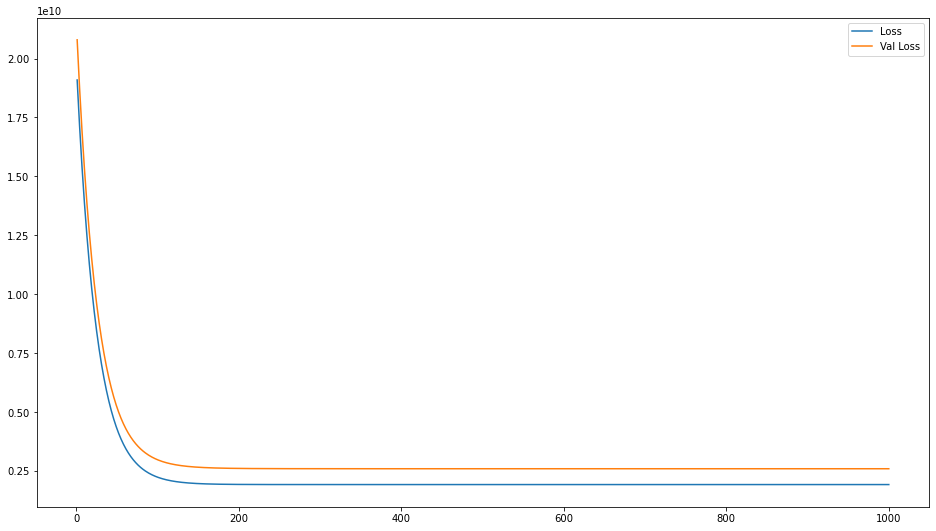

In [357]:
fig = plt.figure(figsize=(16,9))
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(multi_model.loss),label='Loss')
plt.plot(np.arange(start=1, stop=1001, step=1),np.array(multi_model.val_loss),label='Val Loss',)
_ = plt.legend()

## Problem 10: (Advance task) Derivation of update formula
The update formula for the steepest descent method was as follows. Explain the process by which this equation is derived.

<center> $θ_{j} = θ_{j} -  α \frac{1}{m} \sum_{1}^{m} {[h_{θ}(x^{(i)}) - y^{(i)} ) x_{j}^{(i)}]}$ </center>


You can start the explanation with the following formula.

<center> $θ_{j} = θ_{j} - \frac{∂}{∂θ_{j}} J(θ) $ </center>


Objective function (loss function) J(θ)Is the following formula.

<center>$ J(θ) = \frac{1}{2m} \sum_{1}^{m} {(h_{θ}(x^{(i)}) - y^{(i)} )^{2}}$ </center>

### Explanation
From the formular $J(θ) = \frac{1}{2m} \sum {(h_{θ}(x^{(i)}) - y^{(i)} )^{2}}$ 

I got
$J(θ) = \frac{1}{n} || y - \hat y ||^{2}$

$= \frac{1}{m} ( y - \hat y )^{T} ( y - \hat y )$

$= \frac{1}{m} ( y - xw )^{T} ( y - xw )$

$= \frac{1}{m} (y^{T}y - 2w^{T}x^{T}y - w^{T}x^{T}xw)$

$L = \frac{J}{2}$ = $\frac{1}{2m} (y^{T}y - 2w^{T}x^{T}y - w^{T}x^{T}xw)$

Differentiate to ***L*** to ***θ***

$\frac{∂L}{∂θ} = \frac{∂}{∂θ} (y^{T}y - 2θ^{T}x^{T}y - θ^{T}x^{T}xθ)$

$= \frac{1}{2m} ( - 2x^{T}y - 2x^{T}xθ )$

$= \frac{1}{m} x^{T} (y - xθ)$

$ = \frac{1}{m} x^{T}(y - \hat y)$

#### Update theta

$θ_{j} = θ_{j} -  \frac{1}{m} \sum_{1}^{m} (y_{i} - \hat y_{i}) x_{ji}$

#### Multiply with learning rate

$θ_{j} = θ_{j} -   α\frac{1}{m} \sum_{1}^{m} (y_{i} - \hat y_{i}) x_{ji}$ or  $θ_{j} = θ_{j} -  α \frac{1}{m} \sum _{1}^{m} {[h_{θ}(x^{(i)}) - y^{(i)} ) x_{j}^{(i)}]}$

## Problem 11: (Advance task) Problem of local optimum solution
The steepest descent method generally has the problem of locally optimal solutions. However, with linear regression, you can always find the optimal solution if you continue learning. Please explain it using mathematical formulas and graphs for some reason.

### Explanation
The cost function of Linear Regression: <center>$ J(θ) = \frac{1}{2m} \sum_{1}^{m} {(h_{θ}(x^{(i)}) - y^{(i)} )^{2}}$ </center>

This is a quadratic function. The quadratic function is proved to be convex so it ensures that the minimum exist and it will reach the global minimum with correct learning rate. Here is the shape of quadratic function and how it find the global minimal.

![alt text](convex.png "Convex")